In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
voters = pd.read_excel('/Users/tundra/Documents/polling_stations/data/voters.xlsx')
preferences = pd.read_excel('/Users/tundra/Documents/polling_stations/data/preferences.xlsx')
polling_stations = pd.read_excel('/Users/tundra/Documents/polling_stations/data/polling_stations.xlsx')

In [3]:
voters.head()

,Unnamed: 0,voter,discount
0,0,voter_1,0.09
1,1,voter_2,0.00
2,2,voter_3,0.07
3,3,voter_4,0.00
4,4,voter_5,0.10


In [4]:
preferences.head(50)

,Unnamed: 0,voter,polling_station,preference_priority
0,0,voter_1,polling_station_168,1
1,1,voter_1,polling_station_207,2
2,2,voter_1,polling_station_222,3
3,3,voter_1,polling_station_124,4
4,4,voter_1,polling_station_223,5
5,5,voter_1,polling_station_297,6
6,6,voter_1,polling_station_129,7
7,7,voter_1,polling_station_12,8
8,8,voter_1,polling_station_1,9
9,9,voter_1,polling_station_129,10


In [5]:
polling_stations.tail()

,Unnamed: 0,polling_station,voting_booth,station_cost
395,395,polling_station_396,5,212
396,396,polling_station_397,12,68
397,397,polling_station_398,14,102
398,398,polling_station_399,16,284
399,399,polling_station_400,14,145


In [6]:
polling_stations.describe()

,Unnamed: 0,voting_booth,station_cost
count,400.000000,400.000000,400.000000
mean,199.500000,11.542500,177.645000
std,115.614301,4.387633,73.159379
min,0.000000,5.000000,50.000000
25%,99.750000,8.000000,116.750000
50%,199.500000,11.000000,183.000000
75%,299.250000,15.000000,238.250000
max,399.000000,19.000000,299.000000


STRATEGY: RANDOM ALLOCATION

In [8]:
class RandomVoterAllocator:
    def __init__(self, voters, polling_stations):
        self.voters = voters
        self.polling_stations = polling_stations
    
    def random_allocation(self):
        # Converti la colonna 'polling_station' in un array NumPy
        polling_stations_array = self.polling_stations['polling_station'].values
        
        # Converti la colonna 'voter' in un array NumPy
        voters_array = self.voters['voter'].values
        np.random.shuffle(voters_array)
   
        allocation = {}

        for voter in voters_array:
            station = np.random.choice(polling_stations_array)
            if station in allocation:
                allocation[station].append(voter)
            else:
                allocation[station] = [voter]
        return allocation

# Esempio di utilizzo
#voters_df =  pd.read_excel('data/voters.xlsx')
#polling_stations_df = pd.read_excel('data/preferences.xlsx')

TheRandomAllocator = RandomVoterAllocator(voters, polling_stations)
random_allocation_result = TheRandomAllocator.random_allocation()
print(random_allocation_result)


{'polling_station_378': ['voter_3817', 'voter_1933', 'voter_1698', 'voter_29', 'voter_3405', 'voter_1253', 'voter_3895', 'voter_2815', 'voter_2526', 'voter_2363', 'voter_3070', 'voter_1021', 'voter_1814', 'voter_3309', 'voter_3690', 'voter_567'], 'polling_station_98': ['voter_1673', 'voter_1152', 'voter_1400', 'voter_1527', 'voter_720', 'voter_2835', 'voter_1420', 'voter_2726', 'voter_819', 'voter_3207', 'voter_1105', 'voter_1946', 'voter_789', 'voter_3908'], 'polling_station_125': ['voter_3852', 'voter_1071', 'voter_1163', 'voter_1995', 'voter_1999', 'voter_1706', 'voter_555'], 'polling_station_215': ['voter_1558', 'voter_1044', 'voter_3402', 'voter_3021', 'voter_3281', 'voter_3204', 'voter_2064', 'voter_860', 'voter_2406', 'voter_3171', 'voter_2050', 'voter_1117', 'voter_2122', 'voter_2011'], 'polling_station_352': ['voter_2898', 'voter_123', 'voter_3372', 'voter_2907', 'voter_226', 'voter_125', 'voter_71', 'voter_1732', 'voter_2420', 'voter_695', 'voter_1584', 'voter_2627'], 'pollin

In [9]:
# a dataframe is built to better check the results
allocation_df = pd.DataFrame(list(random_allocation_result.items()), columns=['Station', 'Voters'])
allocation_df

,Station,Voters
0,polling_station_378,"[voter_3817, voter_1933, voter_1698, voter_29,..."
1,polling_station_98,"[voter_1673, voter_1152, voter_1400, voter_152..."
2,polling_station_125,"[voter_3852, voter_1071, voter_1163, voter_199..."
3,polling_station_215,"[voter_1558, voter_1044, voter_3402, voter_302..."
4,polling_station_352,"[voter_2898, voter_123, voter_3372, voter_2907..."
...,...,...
395,polling_station_207,"[voter_3166, voter_2004, voter_3509]"
396,polling_station_266,"[voter_84, voter_3173, voter_131, voter_2423, ..."
397,polling_station_168,"[voter_3197, voter_3102, voter_1680, voter_261..."
398,polling_station_213,"[voter_3607, voter_3841, voter_159, voter_2211]"


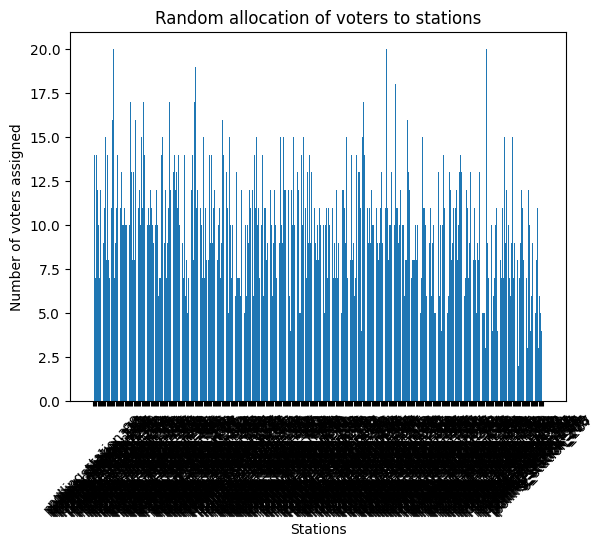

In [10]:
stations_extraction = list(random_allocation_result.keys())
num_voters_extraction = [len(voters) for voters in random_allocation_result.values()]

# creating a bar graph
plt.bar(stations_extraction, num_voters_extraction)
plt.xlabel('Stations')
plt.ylabel('Number of voters assigned')
plt.title('Random allocation of voters to stations')
plt.xticks(rotation=45)
plt.show()

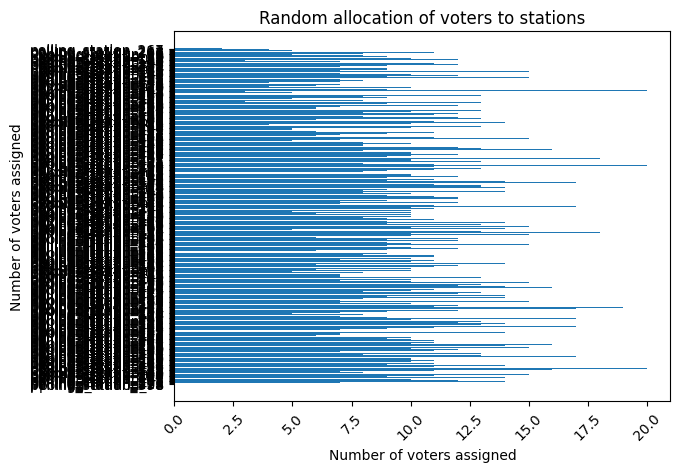

In [11]:
stations_extraction = list(random_allocation_result.keys())
num_voters_extraction = [len(voters) for voters in random_allocation_result.values()]

plt.barh(stations_extraction, num_voters_extraction)
plt.xlabel('Number of voters assigned')
plt.ylabel('Number of voters assigned')
plt.title('Random allocation of voters to stations')
plt.xticks(rotation=45)
plt.show()

STRATEGY: ALLOCATION BASED ON PREFERENCES

In [12]:
polling_stations.head()

,Unnamed: 0,polling_station,voting_booth,station_cost
0,0,polling_station_1,13,273
1,1,polling_station_2,18,92
2,2,polling_station_3,12,141
3,3,polling_station_4,18,157
4,4,polling_station_5,7,298


In [13]:
class PreferenceVoterAllocator:
    def __init__(self, voters, preferences, polling_stations):
        self.voters = voters
        self.preferences = preferences
        self.polling_stations = polling_stations
        self.allocation_result = None
        self.station_capacity = None 

    def initialise_station_capacity(self):
        self.station_capacity = {}
        for _, row in self.polling_stations.iterrows():
            self.station_capacity[row['polling_station']] = row['voting_booth']

    def preference_based_allocation(self):
        allocation = {}
        sorted_preferences = self.preferences.sort_values(by=['voter','preference_priority'])

        for _, row in sorted_preferences.iterrows():
            voter = row['voter']
            station = row['polling_station']

            if self.station_capacity[station] > 0:
                if voter in allocation:
                    allocation[voter].append(station)
                else:
                    allocation[voter] = [station]
                self.station_capacity[station] -= 1

        self.allocation_result = allocation

    def print_allocation_result(self):
        if self.allocation_result:
            print(self.allocation_result)
        else:
            print("Run allocation first.")

preference_voter_allocator = PreferenceVoterAllocator(voters, preferences, polling_stations)
preference_voter_allocator.initialise_station_capacity()
preference_voter_allocator.preference_based_allocation()

preference_voter_allocator.print_allocation_result()

{'voter_1': ['polling_station_168', 'polling_station_207', 'polling_station_222', 'polling_station_124', 'polling_station_223', 'polling_station_297', 'polling_station_129', 'polling_station_12', 'polling_station_1', 'polling_station_129', 'polling_station_46', 'polling_station_343', 'polling_station_338', 'polling_station_90', 'polling_station_269', 'polling_station_237', 'polling_station_22', 'polling_station_97'], 'voter_10': ['polling_station_60', 'polling_station_317', 'polling_station_95', 'polling_station_22', 'polling_station_319', 'polling_station_279', 'polling_station_275', 'polling_station_185', 'polling_station_370', 'polling_station_95', 'polling_station_292', 'polling_station_294', 'polling_station_391', 'polling_station_350', 'polling_station_260', 'polling_station_265', 'polling_station_344', 'polling_station_343', 'polling_station_292', 'polling_station_316', 'polling_station_123', 'polling_station_262', 'polling_station_58', 'polling_station_241', 'polling_station_68

In [14]:
print(type(preference_voter_allocator.allocation_result))

<class 'dict'>


In [15]:
preference_allocation_result = pd.DataFrame.from_dict(preference_voter_allocator.allocation_result, orient='index')
#preference_allocation_result.head()

In [16]:
print(type(preference_allocation_result))

<class 'pandas.core.frame.DataFrame'>


In [17]:
preference_allocation_result.head(10)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
voter_1,polling_station_168,polling_station_207,polling_station_222,polling_station_124,polling_station_223,polling_station_297,polling_station_129,polling_station_12,polling_station_1,polling_station_129,...,None,None,None,None,None,None,None,None,None,None
voter_10,polling_station_60,polling_station_317,polling_station_95,polling_station_22,polling_station_319,polling_station_279,polling_station_275,polling_station_185,polling_station_370,polling_station_95,...,None,None,None,None,None,None,None,None,None,None
voter_100,polling_station_73,polling_station_154,polling_station_45,polling_station_377,polling_station_141,polling_station_75,polling_station_300,polling_station_44,polling_station_215,polling_station_20,...,None,None,None,None,None,None,None,None,None,None
voter_1000,polling_station_396,polling_station_7,polling_station_391,polling_station_351,polling_station_102,polling_station_147,polling_station_184,polling_station_224,polling_station_46,polling_station_106,...,polling_station_32,polling_station_68,polling_station_333,polling_station_155,polling_station_306,polling_station_103,polling_station_232,polling_station_207,polling_station_55,polling_station_143
voter_1001,polling_station_109,polling_station_52,polling_station_33,polling_station_204,polling_station_249,polling_station_198,polling_station_208,polling_station_306,polling_station_18,polling_station_97,...,polling_station_25,polling_station_126,polling_station_272,polling_station_140,None,None,None,None,None,None
voter_1002,polling_station_88,polling_station_219,polling_station_34,polling_station_141,polling_station_362,polling_station_177,polling_station_91,polling_station_55,polling_station_215,polling_station_199,...,None,None,None,None,None,None,None,None,None,None
voter_1003,polling_station_35,polling_station_87,polling_station_113,polling_station_128,polling_station_58,polling_station_284,polling_station_382,polling_station_32,None,None,...,None,None,None,None,None,None,None,None,None,None
voter_1004,polling_station_9,polling_station_152,polling_station_74,polling_station_30,polling_station_94,polling_station_168,polling_station_201,polling_station_263,polling_station_236,polling_station_339,...,None,None,None,None,None,None,None,None,None,None
voter_1005,polling_station_330,polling_station_243,polling_station_382,polling_station_252,polling_station_74,polling_station_8,polling_station_162,polling_station_340,polling_station_102,polling_station_197,...,None,None,None,None,None,None,None,None,None,None
voter_1006,polling_station_64,polling_station_381,polling_station_287,polling_station_52,polling_station_71,polling_station_352,polling_station_25,polling_station_42,polling_station_11,polling_station_342,...,None,None,None,None,None,None,None,None,None,None


In [18]:
num_rows = preference_allocation_result.shape[0]
print("Number of rows: ", num_rows)

Number of rows:  354


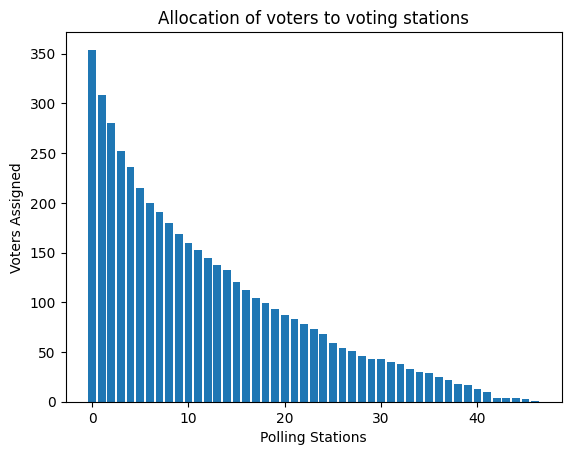

In [19]:
# number of voters assigned to each station
preferences_allocation_counts = preference_allocation_result.count()

plt.bar(preferences_allocation_counts.index, preferences_allocation_counts.values)
plt.xlabel('Polling Stations')
plt.ylabel('Voters Assigned')
plt.title('Allocation of voters to voting stations')
plt.show()

STRATEGY: PRICE BASED ALLOCATION 🏦

In [30]:
voters.columns

Index(['Unnamed: 0', 'voter', 'discount'], dtype='object')

In [31]:
polling_stations.columns

Index(['Unnamed: 0', 'polling_station', 'voting_booth', 'station_cost'], dtype='object')

In [32]:
preferences.columns

Index(['Unnamed: 0', 'voter', 'polling_station', 'preference_priority'], dtype='object')

In [20]:
class PriceVoterAllocator:
    def __init__(self, voters, polling_stations):
        self.voters = voters
        self.polling_stations = polling_stations
        self.allocation = {}  # Dictionary to store the assignment of voters to polling stations
        self.station_capacity = {}  # Dictionary to track the remaining capacity of each polling station

    def price_based_allocation(self):
        # Initialize the capacity of polling stations
        for _, row in self.polling_stations.iterrows():
            self.station_capacity[row['polling_station']] = row['voting_booth']

        # Sort polling stations by price (from cheapest to most expensive)
        sorted_stations = self.polling_stations.sort_values(by='station_cost')

        # Iterate through voters and assign them to polling stations based on price and capacity
        for _, row in self.voters.iterrows():
            voter = row['voter']
            discount = row['discount']

            # Calculate the maximum price the voter is willing to pay
            max_price = 1 - discount

            # Find the first available polling station with a price less than or equal to the maximum price
            for _, station_row in sorted_stations.iterrows():
                station = station_row['polling_station']
                station_cost = station_row['station_cost']

                if station_cost <= max_price and self.station_capacity[station] > 0:
                    # Assign the voter to the polling station
                    if voter in self.allocation:
                        self.allocation[voter].append(station)
                    else:
                        self.allocation[voter] = [station]
                    # Update the capacity of the polling station
                    self.station_capacity[station] -= 1
                    break

        return self.allocation


# Example usage:
# Assuming you have 'voters' and 'polling_stations' DataFrames
hotel_allocator = PriceVoterAllocator(voters, polling_stations)
price_allocation_result = hotel_allocator.price_based_allocation()
print(price_allocation_result)


{}


In [21]:
import pandas as pd

class VoterAllocator:
    def __init__(self, voters, preferences, polling_stations):
        self.voters = voters
        self.preferences = preferences
        self.polling_stations = polling_stations
        self.allocation_result = None

    def allocate_voters(self):
        # Merge voters with preferences to get the priority
        merged_df = pd.merge(self.voters, self.preferences, on='voter')

        # Merge with polling_stations to get the station details
        merged_df = pd.merge(merged_df, self.polling_stations, on='polling_station')

        # Subtract the discount from the station cost
        merged_df['discounted_cost'] = merged_df['station_cost'] * (1 - merged_df['discount'])

        # Sort by discounted cost and preference priority
        sorted_df = merged_df.sort_values(by=['discounted_cost', 'preference_priority'])

        # Initialize allocation dictionary
        allocation = {}

        # Allocate voters to polling stations
        for _, row in sorted_df.iterrows():
            voter = row['voter']
            polling_station = row['polling_station']

            if polling_station not in allocation:
                allocation[polling_station] = []

            allocation[polling_station].append(voter)

        self.allocation_result = allocation
        return allocation


voter_allocator = VoterAllocator(voters, preferences, polling_stations)
allocation_result = voter_allocator.allocate_voters()

print("Allocation Result:")
print(allocation_result)


Allocation Result:
{'polling_station_190': ['voter_1722', 'voter_3259', 'voter_3098', 'voter_298', 'voter_1184', 'voter_81', 'voter_3938', 'voter_1798', 'voter_3742', 'voter_3883', 'voter_3938', 'voter_1700', 'voter_1511', 'voter_3938', 'voter_3408', 'voter_3840', 'voter_916', 'voter_2954', 'voter_3102', 'voter_3999', 'voter_1605', 'voter_3541', 'voter_1253', 'voter_1482', 'voter_3578', 'voter_1483', 'voter_1714', 'voter_2446', 'voter_471', 'voter_1036', 'voter_2751', 'voter_3871', 'voter_2446', 'voter_2945', 'voter_3542', 'voter_3834', 'voter_3905', 'voter_303', 'voter_2350', 'voter_3424', 'voter_575', 'voter_192', 'voter_152', 'voter_2350', 'voter_2285', 'voter_1513', 'voter_1829', 'voter_119', 'voter_3093', 'voter_3339', 'voter_394', 'voter_3195', 'voter_746', 'voter_2376', 'voter_1385', 'voter_2505', 'voter_305', 'voter_831', 'voter_3723', 'voter_1676', 'voter_2104', 'voter_1715', 'voter_3532', 'voter_2485', 'voter_3685', 'voter_1787', 'voter_3723', 'voter_13', 'voter_550', 'voter_

In [24]:
price_allocation_df = pd.DataFrame.from_dict(allocation_result, orient='index').transpose()
price_allocation_df

,polling_station_190,polling_station_49,polling_station_354,polling_station_301,polling_station_24,polling_station_47,polling_station_321,polling_station_23,polling_station_365,polling_station_167,...,polling_station_289,polling_station_106,polling_station_176,polling_station_250,polling_station_341,polling_station_5,polling_station_168,polling_station_184,polling_station_27,polling_station_230
0,voter_1722,voter_2422,voter_1378,voter_2500,voter_1378,voter_3597,voter_3684,voter_1171,voter_123,voter_1112,...,voter_123,voter_1506,voter_1093,voter_2307,voter_2201,voter_3706,voter_1775,voter_1939,voter_1768,voter_1585
1,voter_3259,voter_2554,voter_2056,voter_3259,voter_3883,voter_2949,voter_3103,voter_1855,voter_2660,voter_3597,...,voter_1299,voter_87,voter_3978,voter_1146,voter_87,voter_1936,voter_1847,voter_2656,voter_1511,voter_521
2,voter_3098,voter_1282,voter_2012,voter_1289,voter_1930,voter_2157,voter_1775,voter_1301,voter_1112,voter_2201,...,voter_2408,voter_1667,voter_3883,voter_3613,voter_1840,voter_742,voter_646,voter_2409,voter_3465,voter_3877
3,voter_298,voter_243,voter_2422,voter_3637,voter_45,voter_1099,voter_3658,voter_3513,voter_1648,voter_3151,...,voter_2246,voter_646,voter_1282,voter_2139,voter_1745,voter_734,voter_2328,voter_1943,voter_2019,voter_3053
4,voter_1184,voter_1096,voter_3534,voter_3151,voter_1943,voter_1251,voter_2157,voter_3151,voter_2065,voter_1425,...,voter_798,voter_3214,voter_1096,voter_1099,voter_1819,voter_3098,voter_1839,voter_1876,voter_1694,voter_23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
294,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
295,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
296,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [32]:
import pandas as pd

class AvailabilityVoterAllocator:
    def __init__(self, voters, preferences, polling_stations):
        self.voters = voters
        self.preferences = preferences
        self.polling_stations = polling_stations
        self.allocation_result = {}

    def allocate_voters(self):
        # Sort polling stations by voting booth availability (most roomy first)
        sorted_stations = self.polling_stations.sort_values(by='voting_booth', ascending=False)

        # Iterate through preferences and allocate voters
        for _, pref_row in self.preferences.iterrows():
            voter = pref_row['voter']
            station = pref_row['polling_station']

            # Check if the station has available voting booths
            if sorted_stations.loc[sorted_stations['polling_station'] == station, 'voting_booth'].iloc[0] > 0:
                # Deduct discount from station cost
                discount = self.voters.loc[self.voters['voter'] == voter, 'discount'].iloc[0]
                station_cost = self.polling_stations.loc[self.polling_stations['polling_station'] == station, 'station_cost'].iloc[0]
                discounted_cost = station_cost * (1 - discount)

                # Update allocation result
                if voter in self.allocation_result:
                    self.allocation_result[voter].append({'polling_station': station, 'discounted_cost': discounted_cost})
                else:
                    self.allocation_result[voter] = [{'polling_station': station, 'discounted_cost': discounted_cost}]

                # Update voting booth availability
                sorted_stations.loc[sorted_stations['polling_station'] == station, 'voting_booth'] -= 1

        return self.allocation_result


# Create an instance of the VoterAllocator class
allocator = AvailabilityVoterAllocator(voters, preferences, polling_stations)

# Allocate voters
availability_allocation_result = allocator.allocate_voters()

# Print the allocation result
print("Allocation Result:")
print(availability_allocation_result)


Allocation Result:
{'voter_1': [{'polling_station': 'polling_station_168', 'discounted_cost': 283.09999999999997}, {'polling_station': 'polling_station_207', 'discounted_cost': 121.6}, {'polling_station': 'polling_station_222', 'discounted_cost': 219.45}, {'polling_station': 'polling_station_124', 'discounted_cost': 242.25}, {'polling_station': 'polling_station_223', 'discounted_cost': 276.45}, {'polling_station': 'polling_station_297', 'discounted_cost': 247.95}, {'polling_station': 'polling_station_129', 'discounted_cost': 80.75}, {'polling_station': 'polling_station_12', 'discounted_cost': 212.79999999999998}, {'polling_station': 'polling_station_1', 'discounted_cost': 259.34999999999997}, {'polling_station': 'polling_station_129', 'discounted_cost': 80.75}, {'polling_station': 'polling_station_46', 'discounted_cost': 203.29999999999998}, {'polling_station': 'polling_station_343', 'discounted_cost': 206.14999999999998}, {'polling_station': 'polling_station_338', 'discounted_cost': 1

REPORT:

In [33]:
#the number of customers accommodated
#number of rooms occupied
#number of different hotels occupied
#total volume of business (total earnings of each hotel)
#the degree of customer satisfaction (calculated according to the 
#location of the hotel assigned to them with respect to their preferences)